In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# solution 6: Train some layers
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)
batch_size = 512
initializer = tf.keras.initializers.RandomNormal()

# create model
first = keras.Sequential()
first.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
first.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))

second = keras.Sequential()
second.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))
second.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))

third = keras.Sequential()
third.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
third.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))

fourth = keras.Sequential()
fourth.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))

In [4]:
# train first
first_model = keras.Sequential()
first_model.add(keras.Input(shape=(784,)))
first_model.add(first)
first_model.add(keras.layers.Dense(10, activation='softmax'))

first_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = first_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 4s - loss: 2.2469 - sparse_categorical_accuracy: 0.3042 - val_loss: 2.1392 - val_sparse_categorical_accuracy: 0.5138 - 4s/epoch - 31ms/step
Epoch 2/100
118/118 - 1s - loss: 2.0606 - sparse_categorical_accuracy: 0.5608 - val_loss: 1.9824 - val_sparse_categorical_accuracy: 0.5877 - 742ms/epoch - 6ms/step
Epoch 3/100
118/118 - 1s - loss: 1.9067 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.8331 - val_sparse_categorical_accuracy: 0.5935 - 700ms/epoch - 6ms/step
Epoch 4/100
118/118 - 1s - loss: 1.7592 - sparse_categorical_accuracy: 0.6124 - val_loss: 1.6910 - val_sparse_categorical_accuracy: 0.6111 - 591ms/epoch - 5ms/step
Epoch 5/100
118/118 - 1s - loss: 1.6223 - sparse_categorical_accuracy: 0.6268 - val_loss: 1.5620 - val_sparse_categorical_accuracy: 0.6294 - 693ms/epoch - 6ms/step
Epoch 6/100
118/118 - 1s - loss: 1.5007 - sparse_categorical_accuracy: 0.6453 - val_loss: 1.4492 - val_sparse_categorical_accuracy: 0.6421 - 681ms/epoch - 6ms/step
Epoch 7/100
118/11

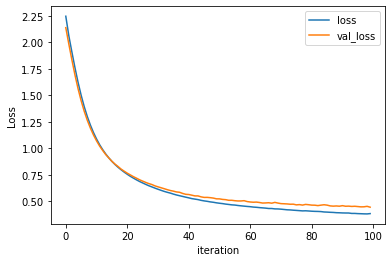

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

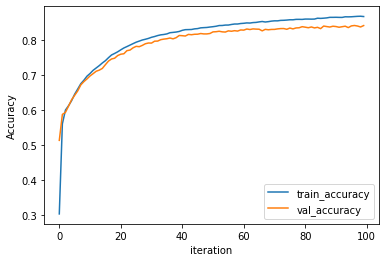

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
# Fix first and train second
second_model = keras.Sequential()
second_model.add(keras.Input(shape=(784,)))
second_model.add(first)
second_model.add(second)
second_model.add(keras.layers.Dense(10, activation='softmax'))

# freeze first
first.trainable = False

second_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = second_model.fit(X_train, y_train, batch_size,
                           validation_data=(X_test, y_test),
                           epochs=100, verbose=2)

Epoch 1/100
118/118 - 1s - loss: 2.3058 - sparse_categorical_accuracy: 0.1366 - val_loss: 2.2981 - val_sparse_categorical_accuracy: 0.1024 - 907ms/epoch - 8ms/step
Epoch 2/100
118/118 - 0s - loss: 2.2968 - sparse_categorical_accuracy: 0.1711 - val_loss: 2.2953 - val_sparse_categorical_accuracy: 0.1350 - 395ms/epoch - 3ms/step
Epoch 3/100
118/118 - 0s - loss: 2.2939 - sparse_categorical_accuracy: 0.2353 - val_loss: 2.2924 - val_sparse_categorical_accuracy: 0.2728 - 375ms/epoch - 3ms/step
Epoch 4/100
118/118 - 0s - loss: 2.2909 - sparse_categorical_accuracy: 0.2715 - val_loss: 2.2895 - val_sparse_categorical_accuracy: 0.3332 - 370ms/epoch - 3ms/step
Epoch 5/100
118/118 - 0s - loss: 2.2879 - sparse_categorical_accuracy: 0.2781 - val_loss: 2.2864 - val_sparse_categorical_accuracy: 0.2937 - 377ms/epoch - 3ms/step
Epoch 6/100
118/118 - 0s - loss: 2.2848 - sparse_categorical_accuracy: 0.3602 - val_loss: 2.2832 - val_sparse_categorical_accuracy: 0.4547 - 360ms/epoch - 3ms/step
Epoch 7/100
118/

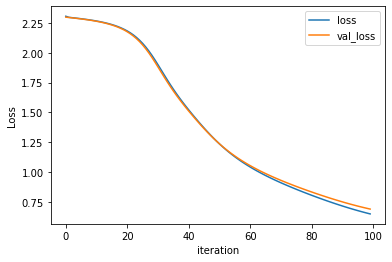

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

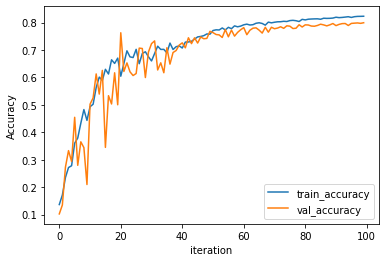

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
# train first and second
third_model = keras.Sequential()
third_model.add(keras.Input(shape=(784,)))
third_model.add(first)
third_model.add(second)
third_model.add(keras.layers.Dense(10, activation='softmax'))

# unfreeze the first network
first.trainable = True

third_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = third_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 1s - loss: 2.2009 - sparse_categorical_accuracy: 0.3641 - val_loss: 1.9320 - val_sparse_categorical_accuracy: 0.4934 - 978ms/epoch - 8ms/step
Epoch 2/100
118/118 - 0s - loss: 1.7747 - sparse_categorical_accuracy: 0.5386 - val_loss: 1.6448 - val_sparse_categorical_accuracy: 0.5722 - 399ms/epoch - 3ms/step
Epoch 3/100
118/118 - 0s - loss: 1.5435 - sparse_categorical_accuracy: 0.5997 - val_loss: 1.4650 - val_sparse_categorical_accuracy: 0.6221 - 386ms/epoch - 3ms/step
Epoch 4/100
118/118 - 0s - loss: 1.3922 - sparse_categorical_accuracy: 0.6759 - val_loss: 1.3425 - val_sparse_categorical_accuracy: 0.6849 - 392ms/epoch - 3ms/step
Epoch 5/100
118/118 - 0s - loss: 1.2845 - sparse_categorical_accuracy: 0.7159 - val_loss: 1.2522 - val_sparse_categorical_accuracy: 0.7168 - 385ms/epoch - 3ms/step
Epoch 6/100
118/118 - 0s - loss: 1.2026 - sparse_categorical_accuracy: 0.7429 - val_loss: 1.1816 - val_sparse_categorical_accuracy: 0.7456 - 371ms/epoch - 3ms/step
Epoch 7/100
118/

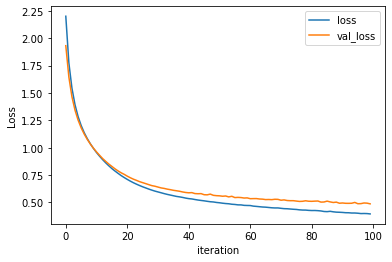

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

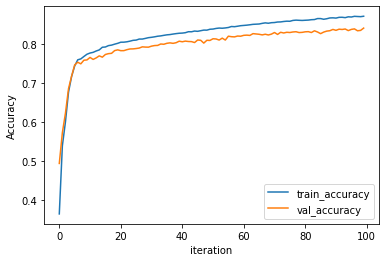

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
# fix first and second, train third
third_model = keras.Sequential()
third_model.add(keras.Input(shape=(784,)))
third_model.add(first)
third_model.add(second)
third_model.add(third)
third_model.add(keras.layers.Dense(10, activation='softmax'))

# freeze first and second
first.trainable = False
second.trainable = False

third_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = third_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 1s - loss: 2.3204 - sparse_categorical_accuracy: 0.1102 - val_loss: 2.2977 - val_sparse_categorical_accuracy: 0.1000 - 1s/epoch - 10ms/step
Epoch 2/100
118/118 - 0s - loss: 2.2957 - sparse_categorical_accuracy: 0.2057 - val_loss: 2.2936 - val_sparse_categorical_accuracy: 0.1001 - 381ms/epoch - 3ms/step
Epoch 3/100
118/118 - 0s - loss: 2.2915 - sparse_categorical_accuracy: 0.2251 - val_loss: 2.2895 - val_sparse_categorical_accuracy: 0.2599 - 381ms/epoch - 3ms/step
Epoch 4/100
118/118 - 0s - loss: 2.2873 - sparse_categorical_accuracy: 0.2897 - val_loss: 2.2852 - val_sparse_categorical_accuracy: 0.3277 - 382ms/epoch - 3ms/step
Epoch 5/100
118/118 - 0s - loss: 2.2827 - sparse_categorical_accuracy: 0.3119 - val_loss: 2.2806 - val_sparse_categorical_accuracy: 0.2203 - 396ms/epoch - 3ms/step
Epoch 6/100
118/118 - 0s - loss: 2.2779 - sparse_categorical_accuracy: 0.4038 - val_loss: 2.2756 - val_sparse_categorical_accuracy: 0.3607 - 383ms/epoch - 3ms/step
Epoch 7/100
118/11

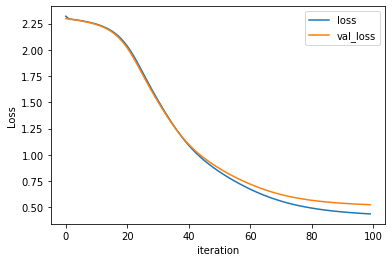

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

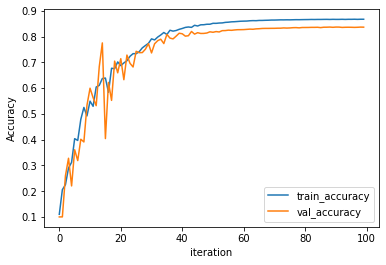

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [16]:
# train first, second, and third
third_model = keras.Sequential()
third_model.add(keras.Input(shape=(784,)))
third_model.add(first)
third_model.add(second)
third_model.add(third)
third_model.add(keras.layers.Dense(10, activation='softmax'))

# unfreeze first and second
first.trainable  = True
second.trainable = True

third_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = third_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 1s - loss: 2.0627 - sparse_categorical_accuracy: 0.3444 - val_loss: 1.7784 - val_sparse_categorical_accuracy: 0.6510 - 1s/epoch - 9ms/step
Epoch 2/100
118/118 - 0s - loss: 1.6085 - sparse_categorical_accuracy: 0.7376 - val_loss: 1.4800 - val_sparse_categorical_accuracy: 0.7410 - 396ms/epoch - 3ms/step
Epoch 3/100
118/118 - 0s - loss: 1.3663 - sparse_categorical_accuracy: 0.7657 - val_loss: 1.2914 - val_sparse_categorical_accuracy: 0.7732 - 404ms/epoch - 3ms/step
Epoch 4/100
118/118 - 0s - loss: 1.2018 - sparse_categorical_accuracy: 0.7942 - val_loss: 1.1567 - val_sparse_categorical_accuracy: 0.7999 - 425ms/epoch - 4ms/step
Epoch 5/100
118/118 - 0s - loss: 1.0784 - sparse_categorical_accuracy: 0.8260 - val_loss: 1.0526 - val_sparse_categorical_accuracy: 0.8001 - 399ms/epoch - 3ms/step
Epoch 6/100
118/118 - 0s - loss: 0.9803 - sparse_categorical_accuracy: 0.8435 - val_loss: 0.9688 - val_sparse_categorical_accuracy: 0.8178 - 417ms/epoch - 4ms/step
Epoch 7/100
118/118

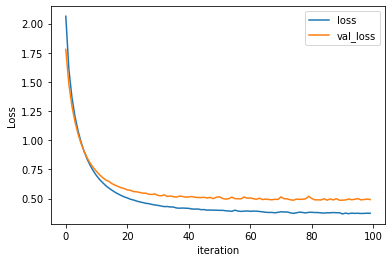

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

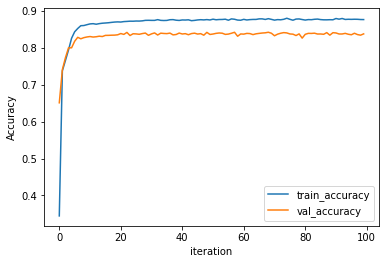

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [19]:
# fix first, second and third, and train fourth
fourth_model = keras.Sequential()
fourth_model.add(keras.Input(shape=(784,)))
fourth_model.add(first)
fourth_model.add(second)
fourth_model.add(third)
fourth_model.add(fourth)
fourth_model.add(keras.layers.Dense(10, activation='softmax'))

# freeze the first network
first.trainable  = False
second.trainable = False
third.trainable  = False

fourth_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = fourth_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 1s - loss: 2.2330 - sparse_categorical_accuracy: 0.3293 - val_loss: 2.1564 - val_sparse_categorical_accuracy: 0.5713 - 1s/epoch - 9ms/step
Epoch 2/100
118/118 - 0s - loss: 2.0853 - sparse_categorical_accuracy: 0.6766 - val_loss: 2.0195 - val_sparse_categorical_accuracy: 0.7282 - 406ms/epoch - 3ms/step
Epoch 3/100
118/118 - 0s - loss: 1.9481 - sparse_categorical_accuracy: 0.7873 - val_loss: 1.8863 - val_sparse_categorical_accuracy: 0.7672 - 387ms/epoch - 3ms/step
Epoch 4/100
118/118 - 0s - loss: 1.8141 - sparse_categorical_accuracy: 0.8272 - val_loss: 1.7566 - val_sparse_categorical_accuracy: 0.7861 - 375ms/epoch - 3ms/step
Epoch 5/100
118/118 - 0s - loss: 1.6842 - sparse_categorical_accuracy: 0.8429 - val_loss: 1.6325 - val_sparse_categorical_accuracy: 0.8159 - 394ms/epoch - 3ms/step
Epoch 6/100
118/118 - 0s - loss: 1.5610 - sparse_categorical_accuracy: 0.8572 - val_loss: 1.5161 - val_sparse_categorical_accuracy: 0.8203 - 362ms/epoch - 3ms/step
Epoch 7/100
118/118

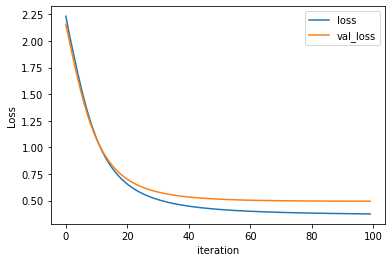

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

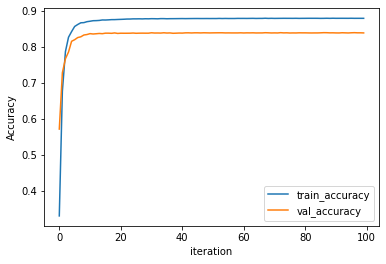

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [22]:
# irst, second, third, and fourth
fourth_model = keras.Sequential()
fourth_model.add(keras.Input(shape=(784,)))
fourth_model.add(first)
fourth_model.add(second)
fourth_model.add(third)
fourth_model.add(fourth)
fourth_model.add(keras.layers.Dense(10, activation='softmax'))

# unfreeze the first network
first.trainable  = True
second.trainable = True
third.trainable  = True

fourth_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

history = fourth_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=300, verbose=2)

Epoch 1/300
118/118 - 1s - loss: 2.0311 - sparse_categorical_accuracy: 0.3909 - val_loss: 1.7173 - val_sparse_categorical_accuracy: 0.6067 - 1s/epoch - 9ms/step
Epoch 2/300
118/118 - 0s - loss: 1.5031 - sparse_categorical_accuracy: 0.7503 - val_loss: 1.3506 - val_sparse_categorical_accuracy: 0.8173 - 412ms/epoch - 3ms/step
Epoch 3/300
118/118 - 0s - loss: 1.2057 - sparse_categorical_accuracy: 0.8614 - val_loss: 1.1275 - val_sparse_categorical_accuracy: 0.8284 - 423ms/epoch - 4ms/step
Epoch 4/300
118/118 - 0s - loss: 1.0156 - sparse_categorical_accuracy: 0.8738 - val_loss: 0.9831 - val_sparse_categorical_accuracy: 0.8384 - 424ms/epoch - 4ms/step
Epoch 5/300
118/118 - 0s - loss: 0.8868 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.8821 - val_sparse_categorical_accuracy: 0.8406 - 433ms/epoch - 4ms/step
Epoch 6/300
118/118 - 0s - loss: 0.7938 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.8089 - val_sparse_categorical_accuracy: 0.8366 - 418ms/epoch - 4ms/step
Epoch 7/300
118/118

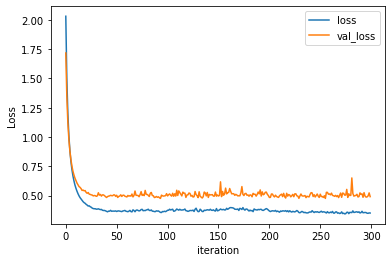

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

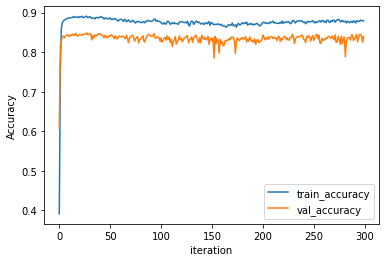

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()